In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the preprocessed data
X_train_scaled = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/X_train_preprocessed.csv')
X_test_scaled = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/X_test_preprocessed.csv')
y_train = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/y_train_preprocessed.csv').squeeze()  
y_test = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/y_test_preprocessed.csv').squeeze()  

# Display the first few rows to confirm loading
print(X_train_scaled.head())
print(X_test_scaled.head())
print(y_train.head())
print(y_test.head())


       YEAR  TotalBudget  STATE_ALASKA  STATE_ARIZONA  STATE_ARKANSAS  \
0 -0.286235     1.065427     -0.147389      -0.149879       -0.144859   
1  0.300796     0.609174     -0.147389      -0.149879       -0.144859   
2 -0.286235    -0.126200     -0.147389      -0.149879       -0.144859   
3  0.887828    -0.380356     -0.147389      -0.149879       -0.144859   
4 -1.460298     0.003801     -0.147389      -0.149879       -0.144859   

   STATE_CALIFORNIA  STATE_COLORADO  STATE_CONNECTICUT  STATE_DELAWARE  \
0         -0.144859       -0.147389          -0.149879       -0.147389   
1         -0.144859       -0.147389          -0.149879       -0.147389   
2         -0.144859       -0.147389          -0.149879       -0.147389   
3         -0.144859       -0.147389          -0.149879       -0.147389   
4         -0.144859       -0.147389          -0.149879       -0.147389   

   STATE_DISTRICT OF COLUMBIA  ...  STATE_VERMONT  STATE_VIRGINIA  \
0                   -0.139673  ...      -0.1473

In [15]:
print("Missing values in X_train_scaled:", X_train_scaled.isnull().sum().sum())
print("Missing values in X_test_scaled:", X_test_scaled.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())


Missing values in X_train_scaled: 0
Missing values in X_test_scaled: 0
Missing values in y_train: 24
Missing values in y_test: 6


# Handle Missing Values in Target Variables

In [17]:
# Fill missing values in y_train and y_test with the mean
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Verify that there are no more missing values
print("Missing values in y_train after filling:", y_train.isnull().sum())
print("Missing values in y_test after filling:", y_test.isnull().sum())


Missing values in y_train after filling: 0
Missing values in y_test after filling: 0


# Model Training and Evaluation

Mean Squared Error: 0.48107230524988154
R-squared: 0.9722635088813371


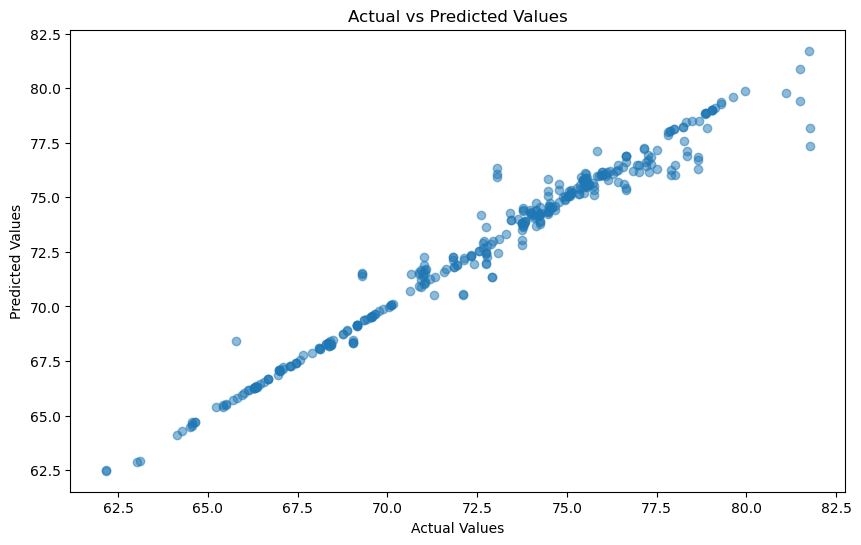

In [18]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


# Feature Importance Analysis


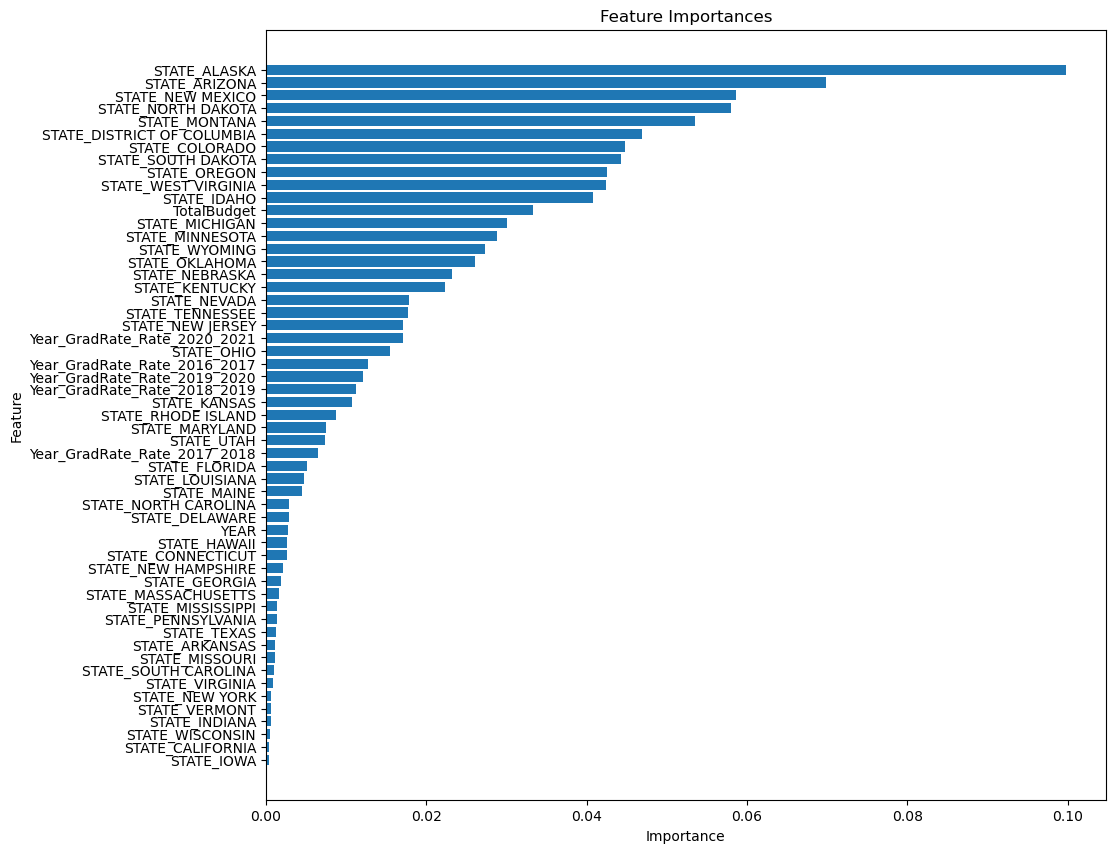

In [6]:
# Get feature importances from the trained model
feature_importances = rf.feature_importances_
features = X_train_scaled.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()

# Adjust the spacing
plt.subplots_adjust(left=0.3)  # Increase left margin to give more space for y-axis names

plt.show()


# Hyperparameter Tuning

In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9684960478108527


# Load the Preprocessed Data and Handle NaN Values

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
X_train_scaled = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/X_train_preprocessed.csv')
X_test_scaled = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/X_test_preprocessed.csv')
y_train = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/y_train_preprocessed.csv').squeeze()  
y_test = pd.read_csv('C:/Users/user/Desktop/StateEdFundingImpact/data/y_test_preprocessed.csv').squeeze()

# Fill NaN values in the target variable with the mean of the target variable
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Display the first few rows to verify the data
print("X_train_scaled:\n", X_train_scaled.head())
print("X_test_scaled:\n", X_test_scaled.head())
print("y_train:\n", y_train.head())
print("y_test:\n", y_test.head())


X_train_scaled:
        YEAR  TotalBudget  STATE_ALASKA  STATE_ARIZONA  STATE_ARKANSAS  \
0 -0.286235     1.065427     -0.147389      -0.149879       -0.144859   
1  0.300796     0.609174     -0.147389      -0.149879       -0.144859   
2 -0.286235    -0.126200     -0.147389      -0.149879       -0.144859   
3  0.887828    -0.380356     -0.147389      -0.149879       -0.144859   
4 -1.460298     0.003801     -0.147389      -0.149879       -0.144859   

   STATE_CALIFORNIA  STATE_COLORADO  STATE_CONNECTICUT  STATE_DELAWARE  \
0         -0.144859       -0.147389          -0.149879       -0.147389   
1         -0.144859       -0.147389          -0.149879       -0.147389   
2         -0.144859       -0.147389          -0.149879       -0.147389   
3         -0.144859       -0.147389          -0.149879       -0.147389   
4         -0.144859       -0.147389          -0.149879       -0.147389   

   STATE_DISTRICT OF COLUMBIA  ...  STATE_VERMONT  STATE_VIRGINIA  \
0                   -0.139673 

# Train and Evaluate Random Forest Model


Random Forest - MSE: 0.48107230524988154, R-squared: 0.9722635088813371


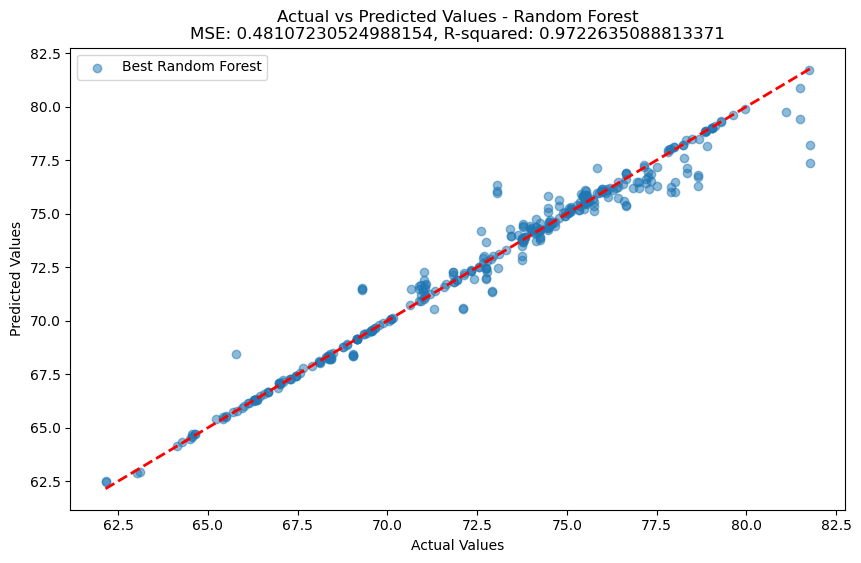

In [9]:
# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f"Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}")

# Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values - Random Forest\nMSE: {mse_rf}, R-squared: {r2_rf}')
plt.legend(["Best Random Forest"], loc="upper left")
plt.show()


# Train and Evaluate Gradient Boosting Model

Gradient Boosting - MSE: 0.618681465809437, R-squared: 0.9643295762519702


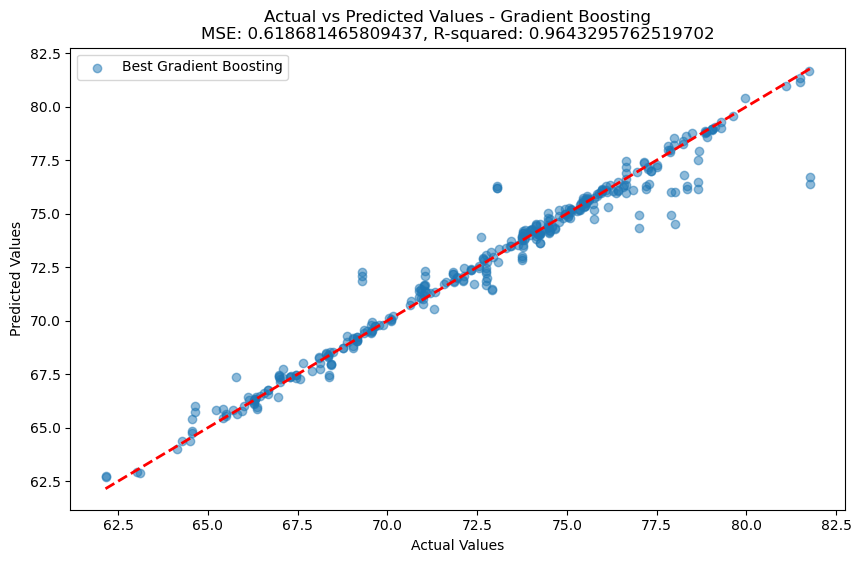

In [10]:
# Initialize and train the Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=5, subsample=0.8, random_state=42)
gb.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_gb = gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the results
print(f"Gradient Boosting - MSE: {mse_gb}, R-squared: {r2_gb}")

# Plot Actual vs Predicted for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values - Gradient Boosting\nMSE: {mse_gb}, R-squared: {r2_gb}')
plt.legend(["Best Gradient Boosting"], loc="upper left")
plt.show()


# Compare Feature Importances

In [11]:
# Feature importances for Random Forest
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train_scaled.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train_scaled.shape[1]), X_train_scaled.columns[indices_rf], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.tight_layout()
plt.show()

# Feature importances for Gradient Boosting
importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Gradient Boosting")
plt.bar(range(X_train_scaled.shape[1]), importances_gb[indices_gb], align="center")
plt.xticks(range(X_train_scaled.shape[1]), X_train_scaled.columns[indices_gb], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

# Summary and Comparison

In [ ]:
# Summary and comparison
print(f"Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}")
print(f"Gradient Boosting - MSE: {mse_gb}, R-squared: {r2_gb}")

# Determine the best model
best_model = "Random Forest" if r2_rf > r2_gb else "Gradient Boosting"
print(f"The best model is: {best_model}")


In [13]:
# Make predictions on the test set
y_pred_gb = best_gb.predict(X_test_scaled)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the results
print(f"Gradient Boosting - MSE: {mse_gb}, R-squared: {r2_gb}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values - Best Gradient Boosting\nMSE: {mse_gb}, R-squared: {r2_gb}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.legend(['Best Gradient Boosting'])
plt.show()


NameError: name 'best_gb' is not defined

## SUMMARY

### Performance Metrics

When we look at the numbers, the Random Forest model shows a Mean Squared Error (MSE) of about 0.48 and an R-squared value of 0.97. This means it’s quite good at predicting our outcomes, and it also clearly indicates which features are most important, making it easier to understand what’s driving the predictions.

On the other hand, the Gradient Boosting model has an MSE of around 0.62 and an R-squared of 0.96. While it also tells us about feature importance, these insights can be a bit less straightforward compared to Random Forest.

### Advantages and Disadvantages

Random Forest Advantages: It handles large datasets well and doesn't overfit easily. Feature importance is clear and easy to grasp.It can manage missing data pretty well. Training can be sped up by running processes in parallel.

Random Forest Disadvantages: It can be heavy on computational resources and memory. Might miss some smaller, intricate patterns in the data.

Gradient Boosting Advantages: Often more accurate and performs better on training data. Captures complex data patterns and interactions. More room to tweak and improve performance through hyperparameters.

Gradient Boosting Disadvantages: Takes longer to train compared to Random Forest. Can overfit if not carefully tuned. Hypersensitive, needs careful tuning to get the best results.

### Visual Comparison
Looking at the visuals:

With the Random Forest, the scatter plot shows a great fit, with predictions closely matching the actual values. The feature importance plot clearly highlights key features, making interpretation easy.

With Gradient Boosting, the scatter plot is also good, but with a slightly higher error margin as indicated by the MSE and R-squared values. The feature importance plot is informative but not as intuitive as Random Forest’s.

### Conclusion

Best Model: The Random Forest model comes out on top due to its lower MSE and higher R-squared value.
Recommendation: For making predictions, go with the Random Forest model because of its superior performance and better interpretability.

NameError: name 'df' is not defined

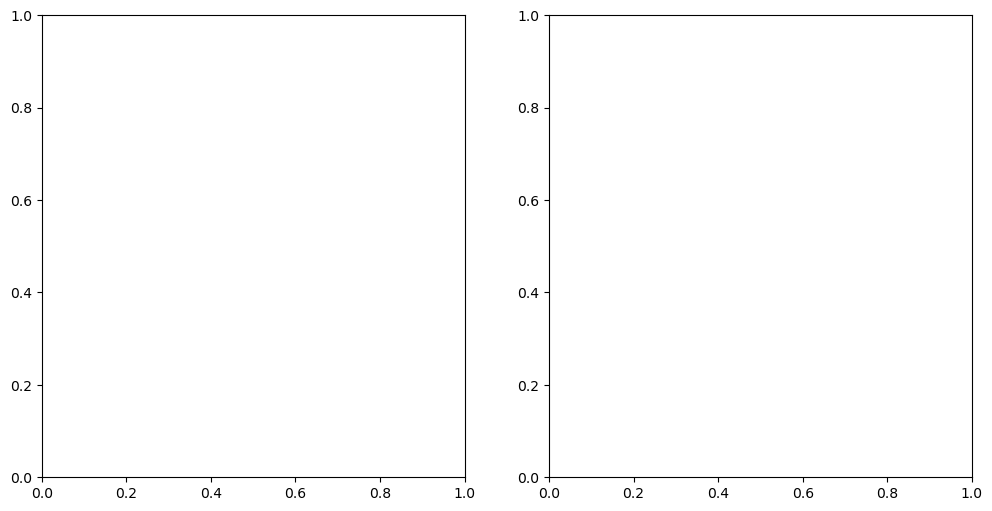

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotting MSE
ax[0].bar(df['Model'], df['MSE'], color=['blue', 'green'])
ax[0].set_title('Comparison of MSE')
ax[0].set_ylabel('Mean Squared Error (MSE)')
ax[0].set_ylim([0, max(df['MSE']) + 0.1])  # Adjust y-limit for better visualization

# Plotting R-squared
ax[1].bar(df['Model'], df['R-squared'], color=['blue', 'green'])
ax[1].set_title('Comparison of R-squared')
ax[1].set_ylabel('R-squared')
ax[1].set_ylim([0.95, 1])  # Adjust y-limit for better visualization

plt.tight_layout()
plt.show()
